<font size= 5> **Predictive Analysis of Chest Pain Types: Exploring Multifactorial Influences** </font>

<font size= 4>  **Introduction** </font>

Chest pain, also known as angina, is characterized by blockages in the blood vessels leading to one’s heart. Four types of these chest pains include typical angina, atypical angina, non-anginal pain and asymptomatic. Typical angina is a substernal chest pain caused by physical exertion while atypical angina is distinguished as epigastric pain (AlBadri et.al., 2017).
 In addition, non-anginal pain is not attributed to an underlying heart disease and asymptomatic chest pain is a temporary change in blood flow to the heart without typical chest pain (Rahel et.al., 2018). Whilst different, they show overlapping symptoms, such as shortness of breath and intense pain that makes it difficult to distinguish between them. Many studies have shown that age, unhealthy eating patterns, stress and more are all accompanied by a greater risk of experiencing angina (“Causes and Risk Factors”)

To conduct a data analysis, we will first determine the correlation between our selected predictors and choose the best correlations to classify which type of chest pain is most likely to occur. A knn classification model will be created and tested for this data analysis 

The set of variables per observation in this data set is

age - the age of the patient (in years)

chest_pain_type - the chest pain type (Value 1: typical angina,  Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

resting_bp - the resting blood pressure (in mm Hg on admission to the hospital)

cholesterol - serum cholesterol (in mg/l)

max_heartrate - the maximum heart rate achieved 
   
heart_diseathe - the diagnosis of heart disease (angiographic disease status



Question: What type of chest pain is most likely to occur based on their age, resting blood sugar, maximum heart rate and presence of heart disease?

<font size= 4>  **Exploring the Dataset** </font>

In [1]:
# library(tidyverse)
# library(repr)
# #library(readxl)
# library(tidymodels)
# #library(ggplot2)
# #install.packages("ggplot2")

library(tidyverse)
library(repr)
library(tidymodels)
library(rsample)
options(repr.matrix.max.rows = 6)
install.packages("ggplot2")
install.packages("GGally")
library(ggplot2)
library(GGally)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
#Loading in the data

url <- "https://raw.githubusercontent.com/Kalpashree10/Group-Project/main/data/processed.hungarian.data"

hungry <- read_csv(url, col_names = c('age', 'sex', 'chest_pain_type', 'resting_bps', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heartrate', 'excercise_angina', 'depression', 'slope', 'major_vessels', 'thal', 'heart_disease'))

hungry

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): resting_bps, cholesterol, fasting_blood_sugar, rest_ecg, max_heartr...
dbl (5): age, sex, chest_pain_type, depression, heart_disease

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,chest_pain_type,resting_bps,cholesterol,fasting_blood_sugar,rest_ecg,max_heartrate,excercise_angina,depression,slope,major_vessels,thal,heart_disease
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
28,1,2,130,132,0,2,185,0,0,?,?,?,0
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,?,?,1
58,0,2,180,393,0,0,110,1,1,2,?,7,1
65,1,4,130,275,0,1,115,1,1,2,?,?,1


<font size= 4>  **Tidying the Data** </font>

**Feature Selection Rationale for Heart Disease Dataset**


In the heart disease dataset, we have opted not to utilize sex, fasting blood sugar, resting electrocardiographic results, exercise-induced angina, depression, and thalassemia lack as they lack direct relevance in predicting the type of chest pain. Fasting blood sugar levels reflect metabolic state, but their direct link to specific types of chest pain in heart disease is unclear. Resting electrocardiographic results provide insights into heart function but do not directly correlate with the qualitative aspects of chest pain. Exercise-induced angina, depression, sex and thalassemia do not directly predict the type of chest pain associated as they lack direct physiological links to cardiac symptoms.


**Removing NA**


In this section, we have removed the missing values from our raw data set. This is because missing values can reduce the performance of our knn model and by removing them we enhance the overall quality of the data set. Here we first determined how many missing values they are, removed them using na.omit() and did a final check to confirm all missing values are now removed from the data set. Using this new clean data set the classification model can continue to be built. 


In [3]:
#Determining how many missing values there are
hungry_na <- hungry|> 
    select(age, chest_pain_type, resting_bps, cholesterol, max_heartrate, heart_disease) |>
    is.na()|>
    nrow()

hungry_na

#removing missing values 
hungry[hungry == "?"] <- NA

hungry_no_NA <- hungry |>
select(age, chest_pain_type, resting_bps, cholesterol, max_heartrate, heart_disease) |> 
        na.omit()
hungry_no_NA


#Checking if any NA values remain after removal
check <- hungry_no_NA |>
            map_df(~sum(is.na(.x)))
check


[1] 294

age,chest_pain_type,resting_bps,cholesterol,max_heartrate,heart_disease
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
28,2,130,132,185,0
29,2,120,243,160,0
30,1,170,237,170,0
⋮,⋮,⋮,⋮,⋮,⋮
56,4,155,342,150,1
58,2,180,393,110,1
65,4,130,275,115,1


age,chest_pain_type,resting_bps,cholesterol,max_heartrate,heart_disease
<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0


**Changing variables into integers**


Here, we are changing our categorical variables into integers so that our data can be compatible with our classification algorithm. This is done by using the function as.integer. Then a tibble was created of this final clean data set so that we can use this new clean data to split into its training and testing sets.


In [4]:
#Changing the variables into integers
hungry_select <- hungry_no_NA |>
     mutate(resting_bps = as.integer(resting_bps),cholesterol = as.integer(cholesterol), max_heartrate = as.integer(max_heartrate), chest_pain_type = as.factor(chest_pain_type))
hungry_select

hungry_final <- as_tibble(hungry_select)
hungry_final

age,chest_pain_type,resting_bps,cholesterol,max_heartrate,heart_disease
<dbl>,<fct>,<int>,<int>,<int>,<dbl>
28,2,130,132,185,0
29,2,120,243,160,0
30,1,170,237,170,0
⋮,⋮,⋮,⋮,⋮,⋮
56,4,155,342,150,1
58,2,180,393,110,1
65,4,130,275,115,1


age,chest_pain_type,resting_bps,cholesterol,max_heartrate,heart_disease
<dbl>,<fct>,<int>,<int>,<int>,<dbl>
28,2,130,132,185,0
29,2,120,243,160,0
30,1,170,237,170,0
⋮,⋮,⋮,⋮,⋮,⋮
56,4,155,342,150,1
58,2,180,393,110,1
65,4,130,275,115,1


<font size= 4>  **Visualization** </font>

**Splitting data**


In this section, we have split our data sets into training and testing data sets using the predictors we want to investigate a relationship for from hungry_select. This is so we can determine if our KNN classification model can properly evaluate unseen data by training it using our training set. Our KNN classification model will be first built upon this training set and then later evaluated using the testing set where a data analysis will be performed. 


In [5]:
#Splitting the data sets into training and testing 
set.seed(1234)


hungry_split <- initial_split(hungry_final, prop = 3/4, strata = chest_pain_type)
hungry_training_2 <- training(hungry_split)
hungry_testing_2 <- testing(hungry_split)


hungry_training_2
hungry_testing_2

age,chest_pain_type,resting_bps,cholesterol,max_heartrate,heart_disease
<dbl>,<fct>,<int>,<int>,<int>,<dbl>
28,2,130,132,185,0
29,2,120,243,160,0
31,2,100,219,150,0
⋮,⋮,⋮,⋮,⋮,⋮
50,4,140,231,140,1
52,4,160,331,94,1
65,4,130,275,115,1


age,chest_pain_type,resting_bps,cholesterol,max_heartrate,heart_disease
<dbl>,<fct>,<int>,<int>,<int>,<dbl>
30,1,170,237,170,0
35,1,120,160,185,0
35,2,150,264,168,0
⋮,⋮,⋮,⋮,⋮,⋮
52,4,140,266,134,1
56,4,155,342,150,1
58,2,180,393,110,1


**Correlation Between Predictors**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


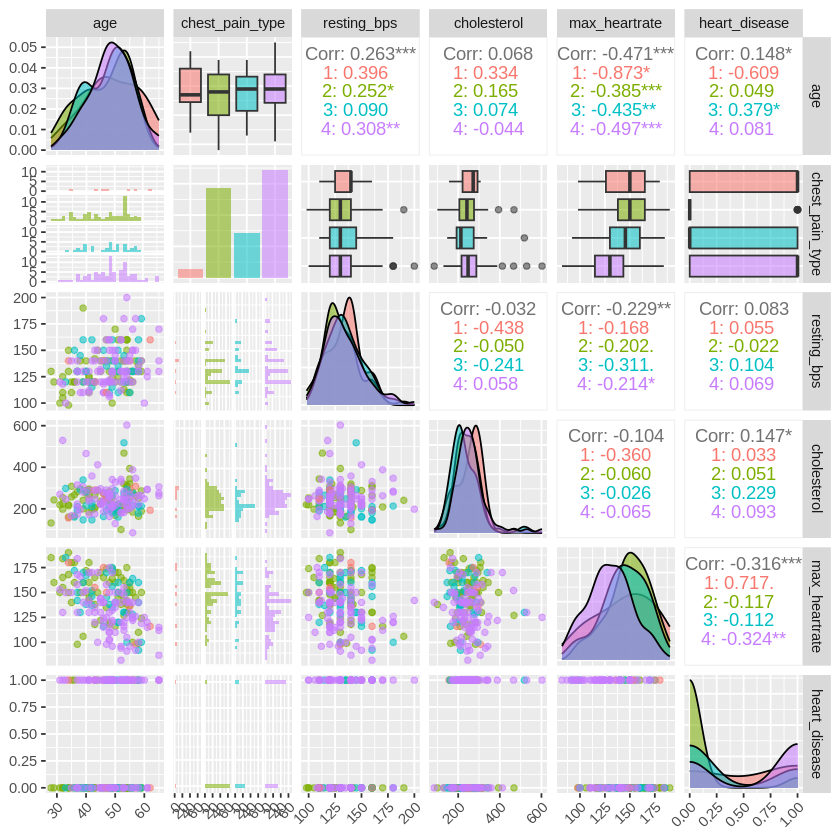

In [6]:
#Determining the correlation between predictors

data_ggpair <- hungry_training_2 |>
                    select(age, chest_pain_type, resting_bps, cholesterol, max_heartrate, heart_disease)

data_ggpair$chest_pain_type = as.factor(data_ggpair$chest_pain_type)

plot <- ggpairs(data_ggpair, aes(color = chest_pain_type, alpha = 0.5), cardinality_threshold = NULL, progress = FALSE) +
                        theme(axis.text.x = element_text(angle = 45, hjust = 1))



plot

Here we have used ggpairs to create a pairplot of all the columns we are interested in including in our model from our training set. Using this pairplot we can determine the correlation between are chosen predictors and determine if there are any relevant relationships that we can look more into. From the classifier, interesting relationships can be noticed in max_heartrate, resting_bps, age and cholesterol. There seems to be high correlations between these predictors and chest pain type in comparison to other predictors. Despite the overall correlations not being so optimal, we have selected a few predictors of interest that we believe will impact the predictions the greatest based on the plot above. If we add up all these small correlations, we may be able to get quite accurate results.



<font size= 3> **Methods Overview:** </font>

Based on the predictors we determined from above we will create a KNN classification model to predict the chest pain type of a new observation. To predict the label of a new observation, the K-nearest neighbours classifier will find the K   “nearest” observations in our training set, and use their diagnoses to predictor the new observation’s diagnosis.


Step 1 - Create a recipe that specifies the class label and predictors and centre and scale to standardize data

Step 2 - 
Perform 10-fold cross-validation to find the best K value for our K-nearest neighbours mode

lStep 3 - 
Create a nearest_neighbors model specification, with neighbours = tune.


)Step 4 - .
Create a tibble to test K values from 1 to

 Step 5 - 10
Add the recipe and model specification to a workflow(), and use the tune_grid function on the train/validation splits to estimate the classifier accuracy for a range o

fStep 6 -   K
Pick a value of K  that yields a high-accuracy estimate that doesn’t change much if you change K to a nearby v

aStep 7 - lue.
Make a new model specification for the best parameter value (i.e.K ), and retrain the classifier using the fit fun

cStep 8 - tion.
Evaluate the estimated accuracy of the classifier on the test set using the predict fu

nStep 9 - ction.
Visualize our final model 

 model 


<font size= 4> **Preprocess the Data** </font>

In [7]:
# recipe for classification
hungry_recipe <- recipe(chest_pain_type ~. , data = hungry_training_2)|>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

Here we created a recipe for our classifier and scaled and centered our data so that we can use standardized data. Standardizing the data ensures that each feature contributes equally to the model's decision-making process. Without standardization, features with larger scales can dominate the calculation of similarities.

In [8]:
#creating folds
hungry_vfold <- vfold_cv(hungry_training_2, v = 10, strata = chest_pain_type)

Here we decided to use a vfold argument of 10 since typically the more we use the better the accuracy estimate will be with a lower standard error. However, because of the limit of computational power we decided to do 10 so that it does not take too long to run the analysis. 

<font size= 4> **Training the Classifier** </font>

In [19]:
## training starts here
# tuning
hungry_tune <- nearest_neighbor(weight_fun = "rectangular", neighbors = tune())|>
    set_engine("kknn") |>
    set_mode("classification")

# creating a tibble to set the neighbours
k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

#if you are writing the justification, make something up for why we picked neighbours of 1-10 lol

knn_results <- workflow() |>
    add_recipe(hungry_recipe)|>
    add_model(hungry_tune) |>
    tune_grid(resamples = hungry_vfold, grid = k_vals) |>
    collect_metrics()

# filtering for the most accurate neighbors
accuracies <- knn_results |>
    filter(.metric == "accuracy")
knn_results
accuracies

→ A | warning: No observations were detected in `truth` for level(s): '1'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x2

There were issues with some computations   A: x4





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.4947243,10,0.02830492,Preprocessor1_Model01
1,roc_auc,hand_till,0.5834987,10,0.01724900,Preprocessor1_Model01
2,accuracy,multiclass,0.4947243,10,0.02830492,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
9,roc_auc,hand_till,0.6304126,10,0.02881222,Preprocessor1_Model09
10,accuracy,multiclass,0.5369716,10,0.03092021,Preprocessor1_Model10
10,roc_auc,hand_till,0.6186618,10,0.02951416,Preprocessor1_Model10


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.4947243,10,0.02830492,Preprocessor1_Model01
2,accuracy,multiclass,0.4947243,10,0.02830492,Preprocessor1_Model02
3,accuracy,multiclass,0.5342439,10,0.02420397,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
8,accuracy,multiclass,0.5260443,10,0.03072814,Preprocessor1_Model08
9,accuracy,multiclass,0.5369173,10,0.03007929,Preprocessor1_Model09
10,accuracy,multiclass,0.5369716,10,0.03092021,Preprocessor1_Model10


Here we have our cross-validation step where we split the overall training data set into 10 evenly sized chunks resulting in 10 different chunks of data set for the validation set. However, we mainly care about the mean accuracy for the different neighbors from 1 to 10. The range of 1 to 10  was chosen to allow for a reasonable exploration of different values without being overly computationally expensive. Thus, we filtered for accuracy as shown in the table above to examine for accuracy. 

<font size= 4> **Model Predictions and Accuracy** </font>

We are now ready to use our model on testing data to make predictions

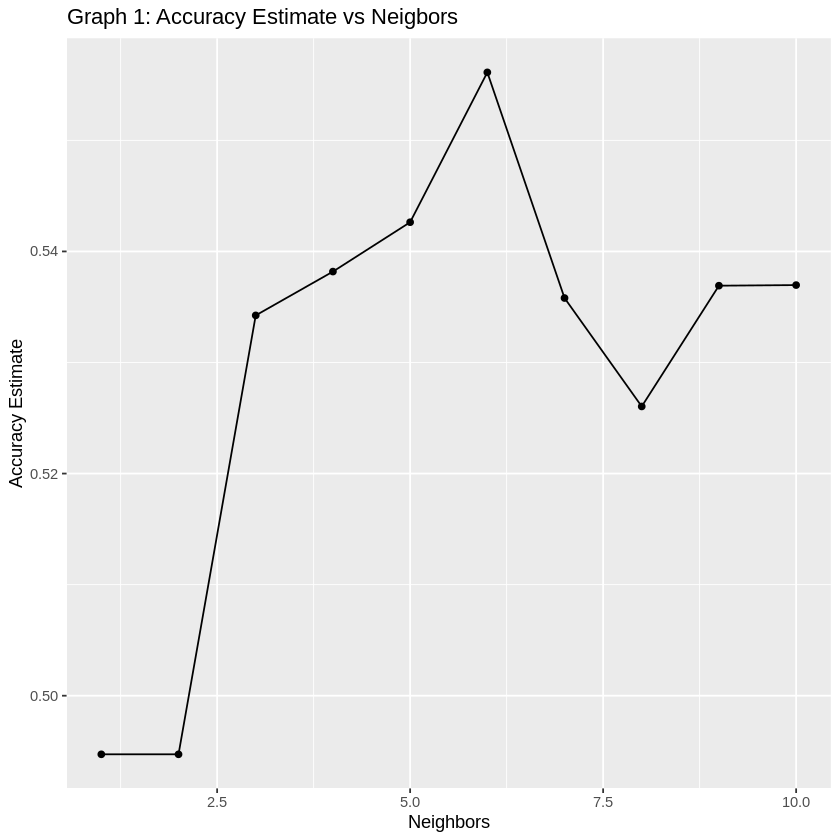

In [31]:
# plotting accuracies vs K
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() + 
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    ggtitle("Graph 1: Accuracy Estimate vs Neigbors")

accuracy_vs_k

We can see from the graph that accuracy increases further when k is larger than about 2.2. On the other hand, we observe that the accuracy starts to drastically decline when K = 6. Since K = 6 offers the highest accuracy and the KNN method slows down with higher K values, we chose to utilize it. This value will be utilized to build the final model since it will provide us with a high prediction accuracy without causing the algorithm to lag. 

In [32]:
# now we create a spec according to what we see in the graph shown above
# we pick k = 6 to fit on the test set
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 6) |>
    set_engine("kknn") |>
    set_mode("classification")

# creating the fit workflow
knn_fit <- workflow() |>
    add_recipe(hungry_recipe) |>
    add_model(knn_spec) |>
    fit(data = hungry_training_2)


Here we are building our classifier based on the K neighbours value of 6 for our training data. As before we need to create a model specification, combine the model specification and recipe into a workflow, and then finally use fit with the training data cancer_train to build the classifier

In [33]:
#actually predicting
hungry_predictions <- predict(knn_fit, hungry_testing_2) |>
    bind_cols(hungry_testing_2) 
hungry_predictions

.pred_class,age,chest_pain_type,resting_bps,cholesterol,max_heartrate,heart_disease
<fct>,<dbl>,<fct>,<int>,<int>,<int>,<dbl>
2,30,1,170,237,170,0
2,35,1,120,160,185,0
2,35,2,150,264,168,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮
4,52,4,140,266,134,1
4,56,4,155,342,150,1
4,58,2,180,393,110,1


Now that we have a K-nearest neighbors classifier object, we can use it to predict the class labels for our test set. We use the bind_cols to add the column of predictions to the original test data, creating the hungry_predictions data frame. The .pred_class contains the predicted chest pain type  from the classifier.

<font size= 4> **Evaluating Performance** </font>

Finally, we can assess our classifier’s performance. First, we will examine accuracy. To do this we use the metrics function.

In [34]:
# looking at the metrics and precision
hungry_predictions_metrics <- hungry_predictions |>
    metrics(truth = chest_pain_type, estimate = .pred_class) |>
    filter(.metric == "accuracy")

hungry_predictions_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.5652174


Here we examined the accuracy of our model where it can be noted that the accuracy of our model is approximately 56.5%

<font size= 4> **Visualizing the Model** </font>

Now we can visualize our model by graphing the predictions for the testing data set.

Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


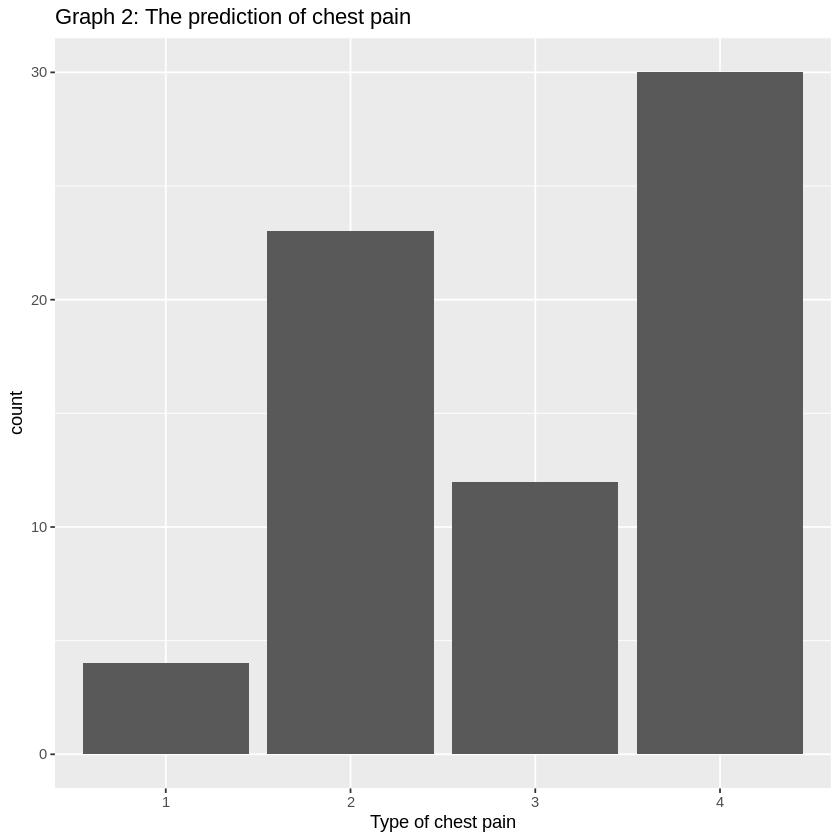

In [20]:
#ploting the test prediction
hungry_predictions_plot <- hungry_predictions |>
                ggplot(aes(x=chest_pain_type))+
                geom_histogram(stat="count")+
                labs(x="Type of chest pain")+
                ggtitle("Graph 2: The prediction of chest pain")
hungry_predictions_plot

Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


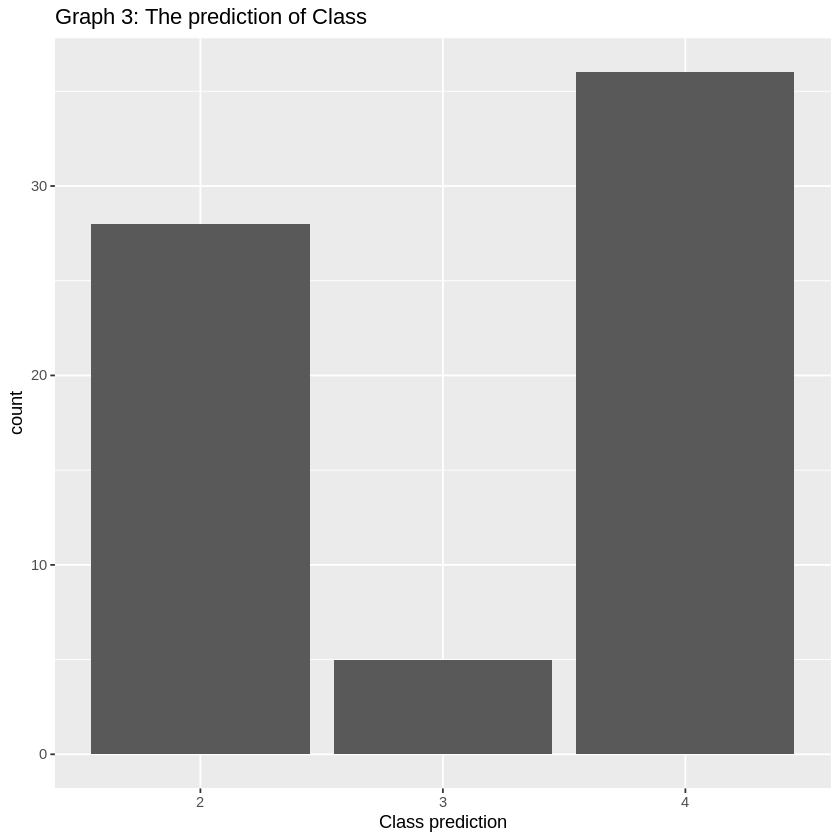

In [21]:
hungry_predictions_plot_1 <- hungry_predictions |>
                ggplot(aes(x=.pred_class))+
                geom_histogram(stat="count")+
                labs(x="Class prediction")+
                ggtitle("Graph 3: The prediction of Class")
hungry_predictions_plot_1

<font size= 4>  **Methods and Results** </font>

If we take a look a closer look at the ggpair graphs we notice an interesting correlation with the predictor's max heart rate, resting bps, age and cholesterol. For instance, from the histograms, we can notice correlations between these predictors and chest pain type where certain predictors are more prominent in types 4 and types 3 and not as common in types 1 and 2. Thus, based on these correlations it would be beneficial to further investigate the role these 4 predictors play on chest pain types by building a knn classification model.


**How can the presence of heart disease used to explain chest pain type**

The presence of heart disease, notably coronary artery disease (CAD), can elucidate the various types of chest pain experienced. Angina, characterized by chest discomfort, often arises due to narrowed arteries impeding blood flow to the heart muscle, causing inadequate oxygen supply. As CAD progresses, complications like heart attacks occur, wherein complete blockage of blood flow to a segment of the heart leads to severe chest pain, along with symptoms like weakness, nausea, sweating, and pain radiating to the arms or shoulder. Additionally, CAD's advancement can result in heart failure, where the weakened heart muscle's inability to pump blood effectively triggers symptoms such as shortness of breath, fatigue, and swelling. Thus, the presence and progression of heart disease contribute to a spectrum of chest pain types, reflecting the evolving nature and severity of the conditio

Reference - 
https://www.cdc.gov/heartdisease/coronary_ad.htm#:~:text=Angina%2C%20or%20chest%20pain%20and,the%20rest%20of%20your%20body. 
el.

<font size= 4>  **Discussion** </font>

**Discuss whether this is what you expected to find?**

This model is fairly accurate at predicting chest pain with an average 56.5% accuracy. Predicting chest pain types in heart disease patients could lead to better diagnosis and care, as well as more targeted interventions and improved long-term outcomes. It may also uncover new insights into the mechanisms behind chest pain, aiding in the discovery of therapeutic targets and predictive markers. 


**Discuss what impact could such findings have?**

The findings from predicting chest pain types can lead to more personalized and effective care strategies, benefiting patients across diverse demographics, including those who are non-verbal by optimizing treatment approaches.


**Discuss what future questions could this lead to?**

Understanding how different types of chest pain correlate with specific heart conditions can lead to insights into the underlying mechanisms of various cardiac diseases. Further investigation could focus on developing targeted interventions based on the type of chest pain observed in individual patients. 


<font size= 4>  **References** </font>

**Dataset -**
Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). *Heart Disease.* UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.


*What are the causes of Chest Pain?* (n.d). Website. https://www.healthline.com/health/chest-pain#causes 


*Typical angina is associated with greater coronary endothelial dysfunction but not abnormal vasodilatory reserve* (2017, Oct). Website.. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5680106/#:~:text=Typical%20angina%20(TA)%20is%20defined,relieved%20with%20rest%20or%20nitroglycerin


*Typical and Atypical Symptoms of Acute Coronary Syndrome: Time to Retire the Terms?* (2017, Jun 12). Website. https://www.ahajournals.org/doi/full/10.1161/JAHA.119.01559

 
*Non-cardiac chest pain: prognosis and secondary healthcare utilisation* (n.d). Website. https://openheart.bmj.com/content/5/2/e00059


*Asymptomatic myocardial ischemia* (1990, Jul 1). Website. https://pubmed.ncbi.nlm.nih.gov/2238747/#:~:text=Silent%20(asymptomatic)%20myocardial%20ischemia%20


*ANGINA (CHEST PAIN), 
Causes and Risk Factors (n.d). Website. *https://www.nhlbi.nih.gov/health/angina/causes 
